# Synthetic complex model with a shallow sphere

This notebook creates a model simulating an complex with magnetization using the poligonal prisms from fatiando and save its parameters in an outer file.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
from scipy import signal

from fatiando import utils
from fatiando.gridder import regular
from fatiando.vis import myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

### Auxiliary functions

In [86]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### Creating the complex model

In [87]:
model = dict()

In [88]:
# model parameters
model['M'] = 30 # number of vertices per prism
model['L'] = 10 # number of prisms
model['P'] = model['L']*(model['M']+2) # number of parameters

model['z0'] = -300.    # depth of the top the shallowest prism
model['dz'] = 800.    # thickness of each prism

model['inc'] = -50.  # inclination
model['dec'] = 9.   # declination
model['intensity'] = 18. # intensity

model['props']={'magnetization': utils.ang2vec(
    model['intensity'], model['inc'], model['dec'])} # physical property: magnetization

#ri = np.linspace(1000., 200., model['M']*model['L']) # radial distance for each vertice
#rand = np.random.uniform(0.8, 1., model['M']*model['L'])
#r = ri*rand

#r = np.random.uniform(low=400., high=700., size=model['M'])
#r = signal.medfilt(r)
r = np.array([ 513.8863825 ,  608.66242761,  608.66242761,  639.21917548,
                554.40019092,  651.54224441,  666.06947764,  666.06947764,
                568.66501881,  568.66501881,  625.57161505,  625.57161505,
                522.11037285,  522.11037285,  542.90744237,  542.90744237,
                405.92270651,  405.92270651,  549.6901502 ,  636.54706803,
                551.61570786,  582.77644177,  582.77644177,  582.77644177,
                464.08301193,  464.08301193,  407.89472325,  407.98706731,
                407.98706731,  407.98706731])
rs = []
#r = np.zeros((model['L'],1),dtype=r.dtype) + r
#r = np.repeat(r[None],model['M'],axis=0)

scale = np.array([1.8, 2.2, 1.6, 1.1, 1.2,
                  0.9, 1.4, 2.6, 2.8, 2.6])

for i in range(model['L']):
    rs.append(r*scale[i])

In [89]:
# Cartesian coordinates of the origin of each prism
x0 = np.linspace(-250., 750., model['L'])
y0 = np.linspace(250., -750., model['L'])
#y0 = np.sqrt(1500.**2. - (x0 - 1000.)**2.) - 500.
l = []   # list of parameters of the prisms

for i, (r, x, y) in enumerate(zip(rs, x0, y0)):
    l.append([r, x, y,
             model['z0'] + model['dz']*i,
             model['z0'] + model['dz']*(i + 1),
              model['props']])

#for i in range(model['L']):
#    l.append([r*(-150.*i*i/11. + 3150.*i/11. + 500.), x0[i], y0[i], model['z0'] + model['dz']*i,\
#          model['z0'] + model['dz']*(i + 1), model['props']])

model['prisms'] = mfun.pol2cart(l, model['M'], model['L'])
model['param_vec'] = mfun.param_vec(l, model['M'], model['L'])

### Model ploting

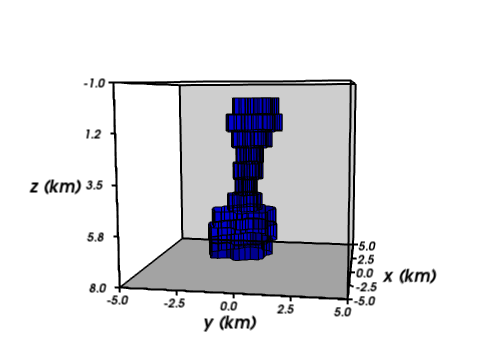

In [90]:
bounds = [-5000., 5000., -5000., 5000., -1000., 8000.]

red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure(size=(500,400))
myv.polyprisms(model['prisms'], 'magnetization', opacity=1., color=blue)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [-19605.307990832091, 3535.8637185321036, -488.18278388495798]
scene.scene.camera.focal_point = [1.1144635930608546e-11, -2.7861589826521362e-13, 1999.999999999998]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.12277735145860294, -0.017502360377677363, -0.99227989466179378]
scene.scene.camera.clipping_range = [12254.374925771437, 29971.123787119483]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)

myv.savefig('data/shallow_true.png')
myv.show()
img(filename='data/shallow_true.png')

### Saving in an outer file

In [91]:
file_name = 'data/model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model, f)